In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST
from torchvision import transforms
from torch.utils.data import DataLoader
plt.rcParams['figure.figsize'] = (8, 8)

In [2]:
## Data loading and transforming
BATCH_SIZE = 120

#Transformation
transform = transforms.Compose([transforms.ToTensor()])

#Downloading and Loading training and test dataset
train_data = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

test_data = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
##Find the shape of input image
images, labels = next(iter(trainloader))
images.shape

torch.Size([120, 1, 28, 28])

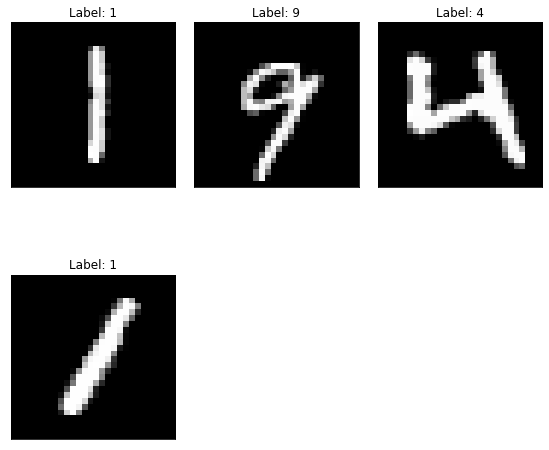

In [8]:
fig = plt.figure()
for i in range(4):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(images[i][0], cmap='gray', interpolation='none')
  plt.title("Label: {}".format(labels[i]))
  plt.xticks([])
  plt.yticks([])


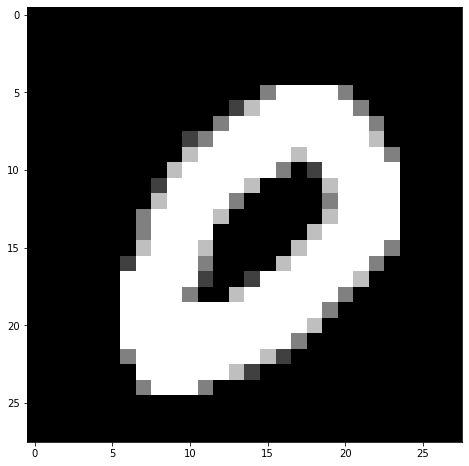

In [4]:
##Ploting image from the dataset
plt.imshow(images[1].reshape(28,28), cmap="gray")

In [9]:
# Check if Gpu is available
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Configure the hyperparameters
num_epochs = 4
num_classes = 10
batch_size = 100
learning_rate = 0.001

In [10]:
device 

device(type='cuda', index=0)

In [13]:
print('Length of train data is: {}'.format(len(train_data)))
print('Length of test data is: {}'.format(len(test_data)))

Length of train data is: 60000
Length of test data is: 10000


In [14]:
# Convolutional neural network (two block convolutional network)
class Custom_cnn(nn.Module):
  def __init__(self, num_classes=10):
    super(Custom_cnn, self).__init__()
    self.block1 = nn.Sequential(
        nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2),
        #in_channels=, out_channels=, kernel_size=, stride=, padding=
        nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
        nn.BatchNorm2d(64),
        nn.ReLU())
    self.block2 = nn.Sequential(
        nn.Conv2d(64,128 , kernel_size=5, stride=1, padding=2),
        nn.Conv2d(128, 256, kernel_size=5, stride=1, padding=2),
        nn.BatchNorm2d(256),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2))
    self.drop_out = nn.Dropout()
    #self.fc1 = nn.Linear(14* 14* 256, 1000)
    self.fc = nn.Linear(14* 14* 256, 10)
    #self.fc2 = nn.Linear(1000, 500)
    #self.fc3= nn.Linear(500, 10)


  def forward(self, x):
    out = self.block1(x)
    out = self.block2(out)
    out = out.reshape(out.size(0), -1)
    out = self.drop_out(out)
    out = self.fc(out)
    #out = self.fc1(out)
    #out = self.fc2(out)
    #out = self.fc3(out)
    return out
    
    
model = Custom_cnn(num_classes).to(device)

In [15]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(trainloader)
all_losses = []

for epoch in range(num_epochs):
  ith_epoch_loss = 0.0
  for i, (images, labels) in enumerate(trainloader):
    images = images.to(device)
    labels = labels.to(device)

    #Forward propagation
    outputs = model(images)
    loss = criterion(outputs, labels)

    # Backward and optimize
    #zero the parameter gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    ith_epoch_loss += loss.item()
    if (i+1) % 100 == 0:
      print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, total_step, loss.item()))
      all_losses .append(ith_epoch_loss/ BATCH_SIZE)
      ith_epoch_loss = 0.0


Epoch [1/4], Step [100/500], Loss: 0.1763
Epoch [1/4], Step [200/500], Loss: 0.2034
Epoch [1/4], Step [300/500], Loss: 0.3409
Epoch [1/4], Step [400/500], Loss: 0.1121
Epoch [1/4], Step [500/500], Loss: 0.2359
Epoch [2/4], Step [100/500], Loss: 0.1274
Epoch [2/4], Step [200/500], Loss: 0.0761
Epoch [2/4], Step [300/500], Loss: 0.1210
Epoch [2/4], Step [400/500], Loss: 0.1126
Epoch [2/4], Step [500/500], Loss: 0.0907
Epoch [3/4], Step [100/500], Loss: 0.1486
Epoch [3/4], Step [200/500], Loss: 0.2022
Epoch [3/4], Step [300/500], Loss: 0.0717
Epoch [3/4], Step [400/500], Loss: 0.1961
Epoch [3/4], Step [500/500], Loss: 0.0564
Epoch [4/4], Step [100/500], Loss: 0.0608
Epoch [4/4], Step [200/500], Loss: 0.0859
Epoch [4/4], Step [300/500], Loss: 0.0374
Epoch [4/4], Step [400/500], Loss: 0.1338
Epoch [4/4], Step [500/500], Loss: 0.1561


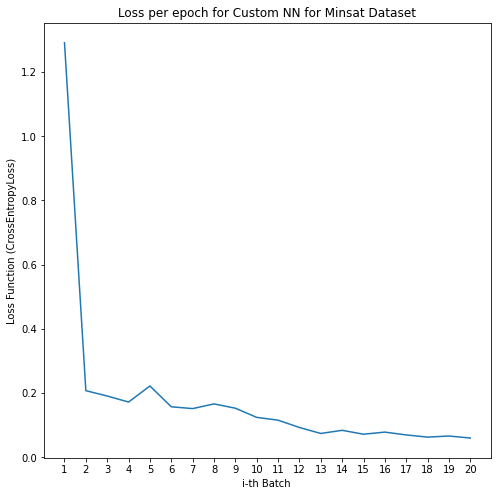

In [16]:
plt.plot(all_losses)
plt.title("Loss per epoch for Custom NN for Minsat Dataset")
plt.ylabel("Loss Function (CrossEntropyLoss)")
plt.xlabel("i-th Batch ")
plt.xticks(np.arange(len(all_losses)), np.arange(1, len(all_losses)+1))
plt.show()

In [17]:
# Evaluate the model 
def eval_model(trained_model):
  # Evaluate the model
  model.eval()
  with torch.no_grad():
    correct_pred = 0
    total = 0
    for images, labels in testloader:
      images = images.to(device)
      labels = labels.to(device)
      outputs = model(images)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct_pred += (predicted == labels).sum().item()

    print('Test Accuracy of the custom CNN model on the test images: {} %'.format(100 * correct_pred / total))


In [18]:
eval_model(model)

Test Accuracy of the custom CNN model on the test images: 98.88 %
